In [26]:
from helpers.io_helper import IO_Helper
from store_error_arrs import _get_filename
from collections import defaultdict


RUN_SIZE = 'full'
ARRAYS_FOLDER = 'arrays'
MODELS_FOLDER = 'models'

BASE_MODEL_ERROR_SCORES = ['ae']
PROB_MODEL_ERROR_SCORES = ['crps', 'ae', 'ssr']

PLOT_FOR_TEST = True
PLOT_FOR_TRAIN = False

SHOW_PLOTS = True
SAVE_PLOTS = True


METHODS_WHITELIST = {
    # 'base_model_hgbr',
    # 'base_model_linreg',
    # 'base_model_nn',
    'native_qhgbr',
    'native_qr',
    'native_gp',
    'native_mvnn',
    'posthoc_cp_hgbr',
    'posthoc_cp_linreg',
    'posthoc_cp_nn',
    'posthoc_la_nn',
}


METHOD_TO_ARR_NAMES_DICT = {
    # 'base_model_hgbr': ['base_model_hgbr_n210432_it30_its3.npy'],
    # 'base_model_linreg': ['base_model_linreg_n210432.npy'],
    # 'base_model_nn': ['base_model_nn_n210432_it400_nh2_hs50.npy'],
    'native_qhgbr': [
        'native_qhgbr_y_pred_n210432_it0.npy',
        'native_qhgbr_y_quantiles_n210432_it0.npy',
        'native_qhgbr_y_std_n210432_it0.npy',
    ],
    'native_qr': [
        'native_quantile_regression_nn_y_pred_n210432_it300_nh2_hs50.npy',
        'native_quantile_regression_nn_y_quantiles_n210432_it300_nh2_hs50.npy',
        'native_quantile_regression_nn_y_std_n210432_it300_nh2_hs50.npy',
    ],
    'native_gp': [
        'native_gpytorch_y_pred_n210432_it200_new.npy',
        'native_gpytorch_y_quantiles_n210432_it200_new.npy',
        'native_gpytorch_y_std_n210432_it200_new.npy',
    ],
    'native_mvnn': [
        'native_mvnn_y_pred_n210432_it100_nh2_hs50.npy',
        'native_mvnn_y_quantiles_n210432_it100_nh2_hs50.npy',
        'native_mvnn_y_std_n210432_it100_nh2_hs50.npy',
    ],
    'posthoc_cp_hgbr': [
        'posthoc_conformal_prediction_base_model_hgbr_y_pred_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_hgbr_y_quantiles_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_hgbr_y_std_n210432_it5.npy',
    ],
    'posthoc_cp_linreg': [
        'posthoc_conformal_prediction_base_model_linreg_y_pred_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_linreg_y_quantiles_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_linreg_y_std_n210432_it5.npy',
    ],
    'posthoc_cp_nn': [
        'posthoc_conformal_prediction_base_model_nn_y_pred_n210432_it5_cp2.npy',
        'posthoc_conformal_prediction_base_model_nn_y_quantiles_n210432_it5_cp2.npy',
        'posthoc_conformal_prediction_base_model_nn_y_std_n210432_it5_cp2.npy',
    ],
    'posthoc_la_nn': [
        'posthoc_laplace_approximation_base_model_nn_y_pred_n210432_it1000_la2.npy',
        'posthoc_laplace_approximation_base_model_nn_y_quantiles_n210432_it1000_la2.npy',
        'posthoc_laplace_approximation_base_model_nn_y_std_n210432_it1000_la2.npy',
    ],
}


def split_pred_arrs_train_test(arrs, n_samples_train):
    arrs_train = list(map(lambda arr: arr[:n_samples_train], arrs))
    arrs_test = list(map(lambda arr: arr[n_samples_train:], arrs))
    return arrs_train, arrs_test


print('loading error arrays')

io_helper = IO_Helper(arrays_folder=ARRAYS_FOLDER, models_folder=MODELS_FOLDER)

# assume test for simplicity
# dataset_to_plot_for = []
# if PLOT_FOR_TRAIN:
#     dataset_to_plot_for.append('training')
# if PLOT_FOR_TEST:
#     dataset_to_plot_for.append('test')

error_arrs = defaultdict(dict)
for uq_method in METHODS_WHITELIST:
    print(f'loading for {uq_method=}')
    error_scores = BASE_MODEL_ERROR_SCORES if uq_method.startswith('base_model') else PROB_MODEL_ERROR_SCORES
    dataset = 'test'
    for error_score in error_scores:
        filename = _get_filename(infix=error_score, uq_method=uq_method, dataset=dataset,
                                 method_to_arr_names_dict=METHOD_TO_ARR_NAMES_DICT)
        error_arr_filename = f'{filename}.npy'
        try:
            error_arr = io_helper.load_array(filename=error_arr_filename)
        except FileNotFoundError as e:
            print(f'error score array {e.filename} not found, skipping')
            continue
        error_arrs[error_score][uq_method] = error_arr
print('done')

INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_mvnn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\native_mvnn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\native_mvnn_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_hgbr_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_hgbr_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_hgbr_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_qhgbr_crps_test.npy
INFO:r

loading error arrays
loading for uq_method='posthoc_cp_nn'
loading for uq_method='native_mvnn'
loading for uq_method='posthoc_cp_hgbr'
loading for uq_method='native_qhgbr'
loading for uq_method='posthoc_la_nn'


INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_quantile_regression_nn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\native_quantile_regression_nn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\native_quantile_regression_nn_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_gpytorch_crps_test.npy
INFO:root:loading array from comparison_storage\array

loading for uq_method='posthoc_cp_linreg'
loading for uq_method='native_qr'
loading for uq_method='native_gp'
done


plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...


INFO:root:saving plot to comparison_storage\plots\hist_plot.png


saving plot


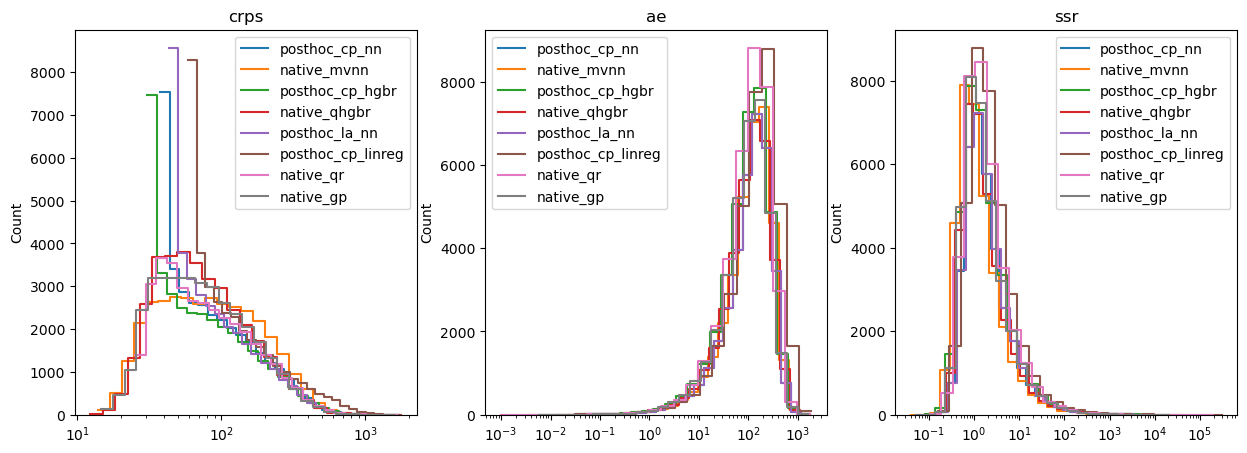

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=len(error_arrs), figsize=(15,5))
for ax, (error_score, error_arr_dict) in zip(axs, error_arrs.items()):
    print(f'plotting histogram for {error_score=}...')
    for uq_method, error_arr in error_arr_dict.items():
        # print(f'... for method {uq_method=}...')
        sns.histplot(error_arr, bins=25, log_scale=True, element="step", fill=False, ax=ax, label=uq_method)
    ax.legend()
    ax.set_title(error_score)

filename=f'hist_plot.png'
if SAVE_PLOTS:
    print('saving plot')
    io_helper.save_plot(filename=filename)
plt.show()